In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [10]:
df=pd.read_csv('NF-UQ-NIDS.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,Dataset
0,149.171.126.0,62073,59.166.0.5,56082,6,0.0,9672,416,11,8,25,15,0,Benign,NF-UNSW-NB15
1,149.171.126.2,32284,59.166.0.5,1526,6,0.0,1776,104,6,2,25,0,0,Benign,NF-UNSW-NB15
2,149.171.126.0,21,59.166.0.1,21971,6,1.0,1842,1236,26,22,25,1111,0,Benign,NF-UNSW-NB15
3,59.166.0.1,23800,149.171.126.0,46893,6,0.0,528,8824,10,12,27,124,0,Benign,NF-UNSW-NB15
4,59.166.0.5,63062,149.171.126.2,21,6,1.0,1786,2340,32,34,25,1459,0,Benign,NF-UNSW-NB15


In [4]:
df = df.drop(columns=['L7_PROTO', 'TCP_FLAGS', 'Dataset', 'Label'])
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,FLOW_DURATION_MILLISECONDS,Attack
0,149.171.126.0,62073,59.166.0.5,56082,6,9672,416,11,8,15,Benign
1,149.171.126.2,32284,59.166.0.5,1526,6,1776,104,6,2,0,Benign
2,149.171.126.0,21,59.166.0.1,21971,6,1842,1236,26,22,1111,Benign
3,59.166.0.1,23800,149.171.126.0,46893,6,528,8824,10,12,124,Benign
4,59.166.0.5,63062,149.171.126.2,21,6,1786,2340,32,34,1459,Benign


In [5]:
df['Attack']=df['Attack'].astype('category')
df['Attack']=df['Attack'].cat.codes

In [6]:
data=df.drop(['IPV4_SRC_ADDR','IPV4_DST_ADDR'],axis=1)
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,FLOW_DURATION_MILLISECONDS,Attack
0,62073,56082,6,9672,416,11,8,15,2
1,32284,1526,6,1776,104,6,2,0,2
2,21,21971,6,1842,1236,26,22,1111,2
3,23800,46893,6,528,8824,10,12,124,2
4,63062,21,6,1786,2340,32,34,1459,2


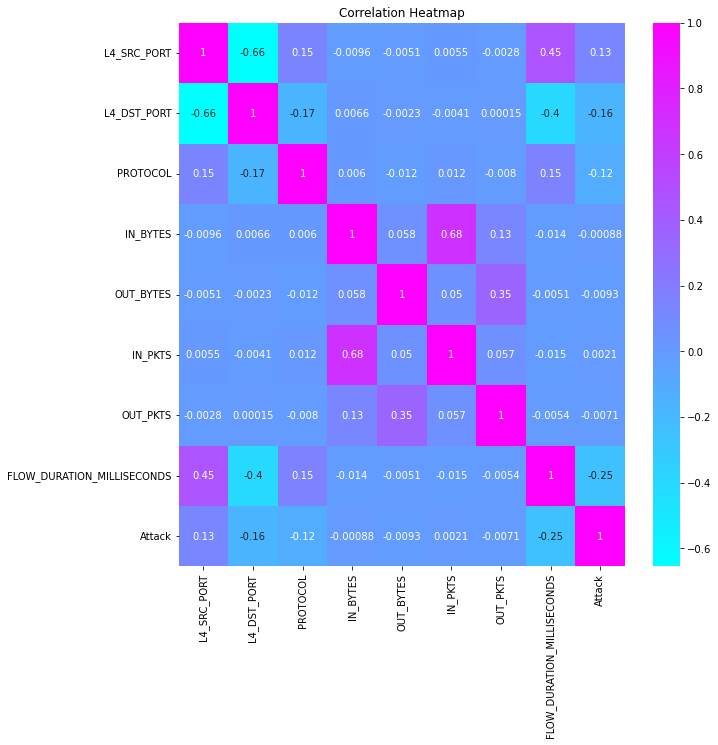

In [7]:
plt.figure(figsize=(10,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

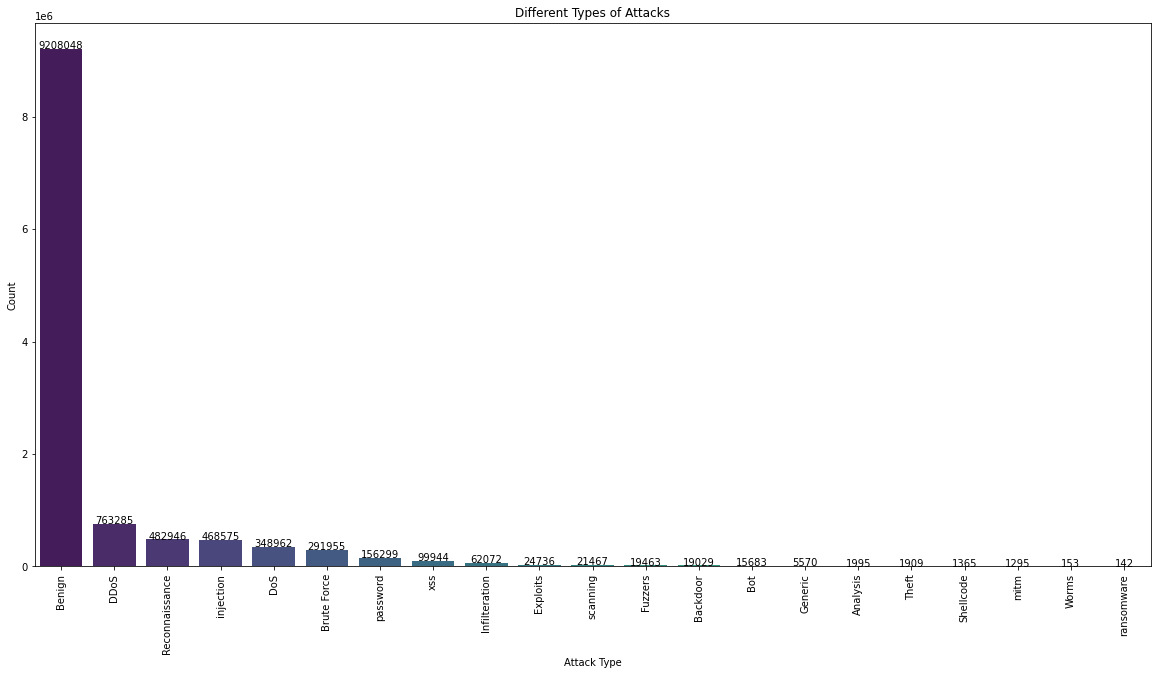

In [11]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Attack', data=df, order=df['Attack'].value_counts().index, palette='viridis')
plt.title('Different Types of Attacks')
plt.xlabel('Attack Type')
plt.xticks(rotation=90)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 2000), ha='center', va='baseline')

In [8]:
df.isna().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
FLOW_DURATION_MILLISECONDS    0
Attack                        0
dtype: int64

In [9]:
df['Attack'].value_counts()

2     9208048
5      763285
11     482946
15     468575
6      348962
4      291955
17     156299
20      99944
10      62072
7       24736
19      21467
8       19463
1       19029
3       15683
9        5570
0        1995
13       1909
12       1365
16       1295
14        153
18        142
Name: Attack, dtype: int64

In [10]:
X = data.drop(['Attack'],axis=1)
y = data[['Attack']]

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X.shape

(11994893, 8)

In [13]:
y.shape

(11994893, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
rf=RandomForestClassifier()

In [17]:
rf.fit(X_train,y_train)

C:\Users\jayav\AppData\Local\Temp\ipykernel_25348\1593328843.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestClassifier()

In [20]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)


MemoryError: 

In [21]:
from sklearn.metrics import classification_report
predictions = rf.predict(X_test)
report = classification_report(y_test, predictions)
print(report)


              precision    recall  f1-score   support

           0       0.02      0.02      0.02       394
           1       0.97      0.90      0.94      3788
           2       0.99      1.00      0.99   1840783
           3       1.00      1.00      1.00      3151
           4       0.73      0.99      0.84     58449
           5       0.79      0.79      0.79    152587
           6       0.68      0.48      0.56     69919
           7       0.76      0.83      0.80      4968
           8       0.57      0.51      0.54      3933
           9       0.60      0.57      0.59      1155
          10       0.35      0.14      0.20     12519
          11       0.92      0.92      0.92     96775
          12       0.82      0.93      0.87       266
          13       0.81      0.81      0.81       332
          14       0.41      0.30      0.35        30
          15       0.47      0.50      0.48     93836
          16       0.41      0.40      0.41       247
          17       0.04    

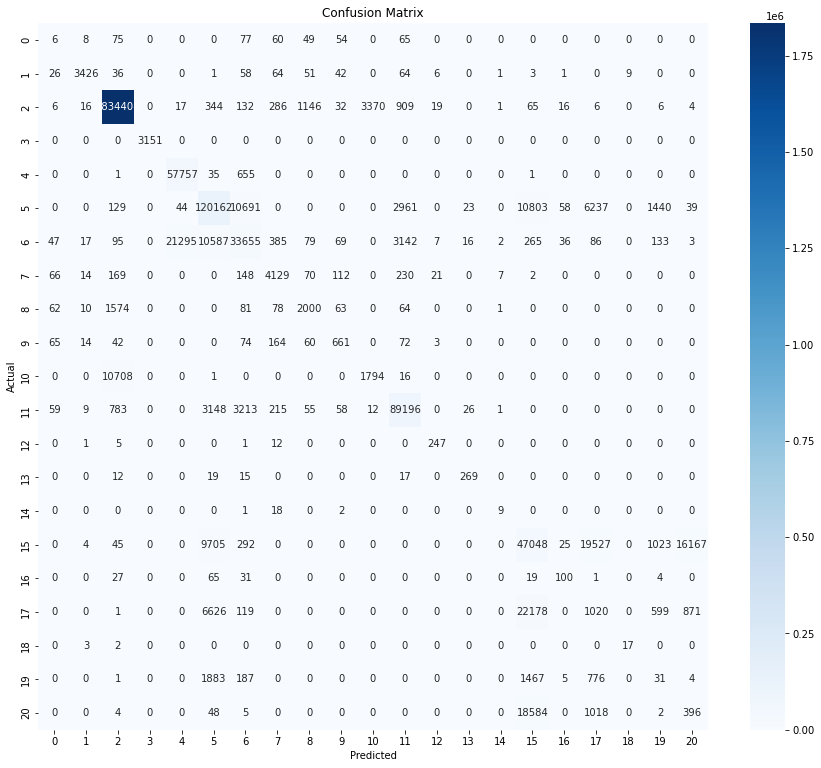

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have predictions and true labels as 'predictions' and 'y_test'
cm = confusion_matrix(y_test, predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(15, 13))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Top 8 important features:
L4_DST_PORT: 0.21011311928972332
L4_SRC_PORT: 0.173285677526889
IN_BYTES: 0.16486422122111563
FLOW_DURATION_MILLISECONDS: 0.16368870313746786
OUT_BYTES: 0.12972844167324374
IN_PKTS: 0.06340952660585006
OUT_PKTS: 0.06171933571604163
PROTOCOL: 0.033190974829668776


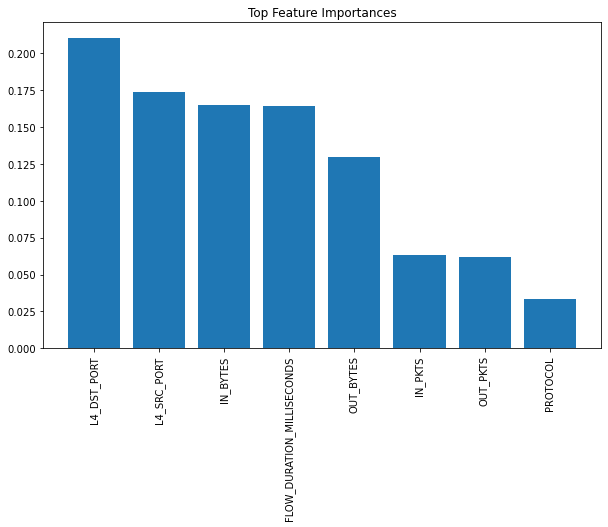

In [32]:
import numpy as np
# Extract feature importances from the model
feature_importances = rf.feature_importances_

# Get the names of the features
feature_names = data.columns

# Sort the features by their importance in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print the top N important features
N = 8  # Change N to the desired number of top features
print(f"Top {N} important features:")
for i in range(N):
    print(f"{feature_names[sorted_feature_indices[i]]}: {feature_importances[sorted_feature_indices[i]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(N), feature_importances[sorted_feature_indices[:N]], tick_label=feature_names[sorted_feature_indices[:N]])
plt.title("Top Feature Importances")
plt.xticks(rotation=90)
plt.show()

Top 8 important features:
L4_DST_PORT: 0.21011311928972332
L4_SRC_PORT: 0.173285677526889
IN_BYTES: 0.16486422122111563
FLOW_DURATION_MILLISECONDS: 0.16368870313746786
OUT_BYTES: 0.12972844167324374
IN_PKTS: 0.06340952660585006
OUT_PKTS: 0.06171933571604163
PROTOCOL: 0.033190974829668776


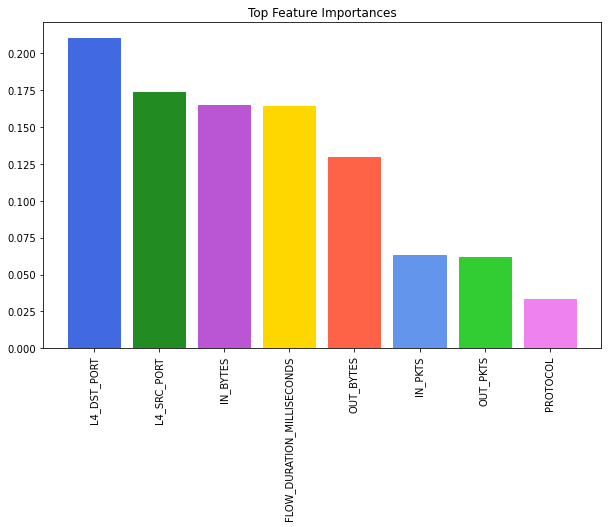

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf.feature_importances_

# Get the names of the features
feature_names = data.columns

# Sort the features by their importance in descending order
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print the top N important features
N = 8  # Change N to the desired number of top features
print(f"Top {N} important features:")
for i in range(N):
    print(f"{feature_names[sorted_feature_indices[i]]}: {feature_importances[sorted_feature_indices[i]]}")

# Define custom colors for the bars
colors = ['royalblue', 'forestgreen', 'mediumorchid', 'gold', 'tomato', 'cornflowerblue', 'limegreen', 'violet']

# Create a colorful bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(N), feature_importances[sorted_feature_indices[:N]], tick_label=feature_names[sorted_feature_indices[:N]])

# Customize the colors of the bars
for i in range(N):
    bars[i].set_color(colors[i])

plt.title("Top Feature Importances")
plt.xticks(rotation=90)
plt.show()


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_scores = rf.predict_proba(X_test)  # X_test is your test data

# Calculate ROC-AUC for each class
n_classes = len(y_test[0])
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()

MemoryError: Unable to allocate 384. MiB for an array with shape (2398979, 1, 21) and data type float64